In [1]:

import tweepy
from tweepy import StreamListener
from tweepy import Stream
import time
import pandas as pd
import json
import numpy as np

consumer_key = 'HcNQa8P7Ft9xBzdYRqa8enOvK'
consumer_secret = 'PPfziRedYlOPIafdmjh9EoAqoXdHq2Zyd5IITGZYXBpr5EHJfN'
access_token = '3177503505-wbBs4jZ0SbHKtfzZX0BARCIoAh5Pz5w5Oo4NnQe'
access_token_secret = 'JNJViixybsP5UGuGqJXKVy2Ewbx4h60PJ8h53nLfkovIO'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
'''class CustomStreamListener(StreamListener):

    def on_status(self, status): 
        print( status.author.screen_name, status.created_at, status.text)
        with open('file.txt', 'w') as f: 
                f.write('Author,Date,Text')
                
                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))


    def on_error(self, status_code):
        print ( sys.stderr, 'Encountered error with status code:', status_code)
        return True # Don't kill the stream

    def on_timeout(self):
        print ( sys.stderr, 'Timeout...')
        return True # Don't kill the stream




streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
streamingAPI.filter(track=['NocheDeLosMuseos'])
'''

"class CustomStreamListener(StreamListener):\n\n    def on_status(self, status): \n        print( status.author.screen_name, status.created_at, status.text)\n        with open('file.txt', 'w') as f: \n                f.write('Author,Date,Text')\n                \n                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))\n\n\n    def on_error(self, status_code):\n        print ( sys.stderr, 'Encountered error with status code:', status_code)\n        return True # Don't kill the stream\n\n    def on_timeout(self):\n        print ( sys.stderr, 'Timeout...')\n        return True # Don't kill the stream\n\n\n\n\nstreamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())\nstreamingAPI.filter(track=['NocheDeLosMuseos'])\n"

In [2]:
"""
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))
"""

'\ndata={}\ni=0\n\nfor tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): \n    #print(tweet.author.screen_name, tweet.created_at,tweet.text)\n    #Archivo.write(str(tweet.author.screen_name)+\'//\'+str( tweet.created_at)+\'//\'+str(tweet.text)+\'\n\n\')\n    retweets=[]\n    for retweet in api.retweets(tweet.id):\n        retweets.append([retweet.user.id,tweet.author.id])\n    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),\n                         "texto":tweet.text,"retweets":retweets}\n    data[tweet.id]=datalinea\n    i+=1\n    print(i)\njson.dump(data,open(\'LaNocheDeLosMuseos2.json\', \'w\'))\n'

In [67]:
#json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

In [ ]:
"""
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="NocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('NocheDeLosMuseos2.json', 'w'))
"""

Para cada tweet vamos a levantar
Autor
Id Autor
Texto
Autores de los retweets
Autores de los me gusta
Autores de los comentarios
fecha


In [84]:
for idtweet in data:
    print(data[idtweet]["retweets"],data[idtweet]["autor"])

[] ViveroFacundo
[] campoadentro16
[] gungurfinearts
[] JcVazquez58
[] SmmMaris
[[3412844729, 281051064]] BCNArgentina
[] chortp
[] eneroman_nora
[] Indembarg
[] ConamMutual
[[376723885, 216106179], [1590956791, 216106179], [851309247887441920, 216106179], [745316089500999680, 216106179], [2714777790, 216106179]] CulturaNacionAR
[] manuelsilsan
[] eneroman_nora
[] miguelgracioso2
[] eneroman_nora
[] DONJULIO400
[] SebZabs
[] Angel4029F
[] karlof11
[] Silvanabanana2
[] silvinanoguera
[[3412844729, 281051064]] BCNArgentina
[] MuseoRoca
[] MuseoDecorativo
[] Adrian80596816
[] silvana_luvera
[] miki_kusanagi
[] Lolenico
[] eneroman_nora
[] C_COM_5
[] Lore__Marquez
[] Claudia65803029
[] sebakatz
[[166148237, 983458110827323393]] MuseoOriental
[] PeronistasUnidx
[] maferrari55
[] Indembarg
[] SmmMaris
[] beatrizbostera3
[] LSpoliansky
[] mamriverplate
[] sebakatz
[] comoalilive
[] sebakatz
[] eneroman_nora
[] Lore__Marquez
[[1250537521, 281051064]] BCNArgentina
[] RcA1_2Prensa
[] Arturo31674

In [18]:
#print(data)

## Grafo desde la cuenta NocheMuseos


In [2]:
def checkFollow(usa,usb):
    relation = api.show_friendship(source_id=usa, target_id=usb)
    if relation[0].following: #I'm not sure if it should be "target" or "source" here
        return True
    return False

In [19]:
#archivo=open('redegodelosmuseos.txt', 'w')
'''
i=0
cuenta="NocheMuseos"
followers = api.followers_ids(cuenta)
#friends = api.friends_ids(cuenta)
#nodos=[]
aristas=[]

#len(followers)
#for follower in followers: 
#    nodos.append(API.)


for nodo1 in followers:
    for nodo2 in followers:
        if nodo1 != nodo2:
            if checkFollow(nodo1,nodo2):
                nuevoenlace=[nodo1, nodo2]
                aristas.append(nuevoenlace)
                print(nuevoenlace)

#print(followers)
#for follower in followers:    
#    aristas.append(follower.screen_name) 
#
#    try:
#        followers1 = api.followers(follower.screen_name,n=1000)    # seguidores de cada amigo la noche de los museos
#    except:
#        print ('Fallo')
#        pass
#    for follower1 in followers1:
#        aristas.append(follower1.screen_name)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-19-9ed18f48bad3>, line 33)

In [20]:
""""
data={'enlaces':aristas}
json.dump(data,open('redegodelosmuseos.json', 'w'))
"""

'"\ndata={\'enlaces\':aristas}\njson.dump(data,open(\'redegodelosmuseos.json\', \'w\'))\n'

### Armar el grafo

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import csv

In [3]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [4]:
G=nx.DiGraph()
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[1697756125, 766202954]
[26836588, 766202954]
[473910174, 766202954]
[37504381, 766202954]
[273588566, 766202954]
[249019880, 766202954]
[751929335490174980, 766202954]
[967157580723380224, 766202954]
[159523752, 2752300754]
[346179894, 2752300754]
[2866714078, 2752300754]
[155066961, 2752300754]
[178731620, 216106179]
[175896620, 584148959]
[227127607, 584148959]
[151022272, 281051064]
[956016182, 281051064]
[3412844729, 281051064]
[177586243, 281051064]
[153602427, 281051064]
[184666963, 281051064]
[1918875967, 281051064]
[130169306, 281051064]
[275572370, 216106179]
[95970921, 216106179]
[3389201182, 216106179]
[784549092, 216106179]
[939637609869045761, 216106179]
[855251772616605696, 216106179]
[562191895, 216106179]
[228950797, 216106179]
[365161396, 216106179]
[844660166276628480, 216106179]
[889147938877976580, 216106179]
[893911335599263745, 216106179]
[371030651, 216106179]
[176289720, 216106179]
[235399940, 216106179]
[25559612, 216106179]
[90394628, 216106179]
[950365561, 2

[361620852, 37494271]
[1020497948868825089, 37494271]
[4634579817, 37494271]
[4228150155, 37494271]
[2474661462, 37494271]
[155283175, 37494271]
[3986669476, 37494271]
[4540822335, 37494271]
[4643594723, 37494271]
[1508965039, 37494271]
[293603575, 37494271]
[780769846745194496, 381608025]
[1600116810, 2372440289]
[3121939925, 2372440289]
[4846309631, 2372440289]
[3147891377, 2372440289]
[129798882, 2372440289]
[4418385076, 2372440289]
[4270874422, 2372440289]
[1005465452116676608, 2372440289]
[1019307861459992577, 2372440289]
[2503188364, 2372440289]
[391058186, 2372440289]
[953615537107537921, 2372440289]
[3297230386, 2372440289]
[872935175948300288, 2372440289]
[1008108155694436352, 2372440289]
[61213931, 2372440289]
[835935778530344960, 2372440289]
[935961157722099714, 2372440289]
[368600084, 2372440289]
[714255642291265536, 2372440289]
[153840267, 186703117]
[911698673272262657, 126380468]
[126380468, 126380468]
[288917330, 154577603]
[158794279, 154577603]
[70763545, 154577603]
[

[942344652, 710875353200336896]
[172909034, 163592728]
[164474243, 163592728]
[136377424, 163592728]
[2895174736, 2493150020]
[1421735412, 2493150020]
[2866714078, 2493150020]
[2909495416, 2493150020]
[738004032787218433, 2602241408]
[1029080403909464065, 2602241408]
[2645447404, 2602241408]
[950365561, 2602241408]
[1041957922174054400, 2602241408]
[365161396, 2602241408]
[4706858962, 2602241408]
[15194086, 2602241408]
[142684449, 2602241408]
[591026167, 1039679218697887745]
[148000720, 727258832121004033]
[95970921, 727258832121004033]
[157433175, 53392867]
[1049881003840421889, 53392867]
[295751970, 53392867]
[154225689, 2428898187]
[905115106530516993, 2428898187]
[2395057795, 4377005313]
[912305527979479042, 4377005313]
[953963595066478592, 4377005313]
[3369177443, 4377005313]
[1430803063, 4377005313]
[3018976097, 4377005313]
[295723049, 4377005313]
[2495683128, 4377005313]
[756618670625923073, 4377005313]
[151252784, 4377005313]
[1078900124, 4377005313]
[241971407, 4377005313]
[16

In [5]:
with open("NocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [6]:
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[981215915088994306, 207760886]
[596839824, 207760886]
[3092621938, 751929335490174980]
[905115106530516993, 751929335490174980]
[2428898187, 751929335490174980]
[558823208, 751929335490174980]
[934234078269837312, 223472601]
[352134337, 223472601]
[1024490176482107392, 223472601]
[844725644298797056, 223472601]
[29715245, 223472601]
[66169172, 269820826]
[133973426, 269820826]
[149621248, 269820826]
[727854296818143232, 269820826]
[3044651872, 269820826]
[170188469, 269820826]
[148000720, 269820826]
[1852571144, 269820826]
[288467604, 269820826]
[922246008716845059, 269820826]
[838814343693275137, 269820826]
[4893437038, 269820826]
[866729287, 269820826]
[4720495168, 269820826]
[751929335490174980, 2428898187]
[200606969, 163592728]
[172909034, 163592728]
[136377424, 163592728]
[982808797336031232, 752203456534970369]
[3381003869, 748235982755987458]
[155118174, 748235982755987458]
[359535812, 2766019447]
[157433175, 2766019447]
[1049881003840421889, 2766019447]
[4160276589, 276601944

In [7]:
crossings = list(G.nodes())
for i in range(1,len(crossings)):
    if crossings[i] == 3147891377:
        print (i,crossings[i])
    else:
        "ni"


382 3147891377


In [ ]:
# Red de seguidores de nodos de red de retweets


archivo=open('RedfollowersG7.txt', 'a')
aristas_followers = []

nodoslista = list(G.nodes())
for idnodes1 in range(380,len(crossings)):                              
    user = api.get_user(nodoslista[idnodes1])               # unformacion del nodo desde el ID
    followers_nodes = api.followers_ids(user.screen_name)   # extraer seguidores de nodo a partir de su nombre de usuario     
    #print (follovers_nodes)
    for idnodes2 in G.nodes():
        if idnodes2 in followers_nodes:                   
            try:                
                nuevoenlace=[api.get_user(nodoslista[idnodes1]).screen_name, api.get_user(idnodes2).screen_name] #guarda directamente la cuenta
                aristas_followers.append(nuevoenlace)
                print(nuevoenlace)
                archivo.write(str(nuevoenlace)+','+str([nodoslista[idnodes1],idnodes2])+'\n')                                       
            except:
                print ("ni idea")                            
            

[u'rubenjacuello1', u'MonterosEva']
[u'rubenjacuello1', u'PeronistasUnidx']
[u'rubenjacuello1', u'SMaradorzini']
[u'rubenjacuello1', u'soniitis2']
[u'rubenjacuello1', u'LaDOSmil19']
[u'mdlpazcolla', u'la2x4']
[u'mdlpazcolla', u'Marianoavalos05']
[u'mdlpazcolla', u'Gabrielmarey']
[u'mdlpazcolla', u'gusqq']
[u'mdlpazcolla', u'lorebetta']


In [21]:
"""
cuentas=[]
with open('cuentasdetwitter.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print (row)
        try:
            Id=api.get_user(list(row.values())[0]).id
        except:
            
            print(list(row.values())[0])
        cuentas.append(Id)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-21-75b170e1d773>, line 12)

In [24]:
archivo=open('cuentas.txt','w')
archivo.write(str(cuentas))
archivo.close()

In [22]:
archivo=open('cuentas.txt','r')
leer=archivo.read()
cuentas=[]
for Id in leer[1:-1].split(','):    
    cuentas.append(int(Id))

In [23]:
print(cuentas)

[584148959, 707540766458048512, 826433648006160384, 191101108, 52496961, 57721953, 404333201, 384133681, 384133681, 179714239, 156558971, 197148304, 366702846, 142766300, 1337263932, 710875353200336896, 4515126989, 4005454761, 146887578, 362242788, 343016679, 2752300754, 100252829, 219662245, 2493150020, 780769846745194496, 275061272, 267247326, 267168237, 1514254435, 161407339, 2223834781, 1246128246, 2275215110, 220370016, 259362862, 625040458, 257458715, 3201979097, 809399058997579776, 1316590854, 1315202034, 2834264529, 419451040, 1350442136, 4474011088, 1447207944, 834022818, 2178031070, 32953007, 1339207069, 932610444895932416, 1365002064, 964834442, 2516650610, 1012382738719141888, 1316590854, 1903782829, 309288964, 135606245, 2576979296, 3246673060, 745316089500999680, 983458110827323393, 549380248, 587807211, 376723885, 830082933096644608, 3305059204, 3784110017, 1278735290, 269820826, 176599529, 466686236, 404133873, 585875540, 155267980, 194255244, 792403349056487424, 285950

Asignamos a cada nodo toda la información sobre el autor

In [9]:
Personas={}
i=0
for d in data.items():
    if d[1]['autorid'] in cuentas:
        Museo=True
        i+=1
        print(i)
    else:
        Museo=False

    try:
        Tweets=Personas[d[1]['autorid']]['cantidad']
        Tweets+=1

        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':Tweets,'Museo':Museo}
    except:    
        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':1,'Museo':Museo}
nx.set_node_attributes(G,Personas)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [105]:
Museos={}
i=0
for d in G.nodes():
    print(d)
    if d in cuentas:
        Museo=True
        i+=1
    else:
        Museo=False
    Museos[d]=Museo
nx.set_node_attributes(G,Museos,'Museo')
print(i)
'''
    try:
        Tweets=Personas[d[1]['autorid']]['cantidad']
        Tweets+=1

        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':Tweets,'Museo':Museo}
    except:    
        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':1,'Museo':Museo}
nx.set_node_attributes(G,Personas)
'''

860946802664763392
907602732906946561
782715427998826498
922246008716845059
796725831179661316
876807033336582149
1007038635940761606
1049881003840421889
1039939895203168264
842833305783492612
938921785826955274
4465844235
810506171341819906
1470558222
842799195815923712
903709496123551745
146534418
840701253957083139
896371398935031812
522145294
32953007
496398364
415973406
714421396655448069
189923360
1247076385
983697272968970241
1046552284820312070
2718109734
3105781084
976532085803569159
145604652
2294702125
1250537521
573872089
247590963
177553461
172949559
182042682
170520635
959104678708613120
1329467456
397291585
748235982755987458
177586243
494215236
716295311342321665
986404765574803456
22949960
355971145
1588879434
186900555
1055975702401552384
282435662
268836947
585875540
780337237
97046614
2808819799
705449766348578816
817152888250241024
194392165
2766819430
633852008
812353606171131904
746796433060265984
112437266
255127662
1369858159
403001456
4705542258
259321971
1986

36


"\n    try:\n        Tweets=Personas[d[1]['autorid']]['cantidad']\n        Tweets+=1\n\n        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':Tweets,'Museo':Museo}\n    except:    \n        Personas[d[1]['autorid']]={'autor':d[1]['autor'],'fecha':(d[1]['fecha']),'texto':(d[1]['texto']),'cantidad':1,'Museo':Museo}\nnx.set_node_attributes(G,Personas)\n"

In [99]:
len(Museos.keys())

2060

In [89]:
len(cuentas)

162

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


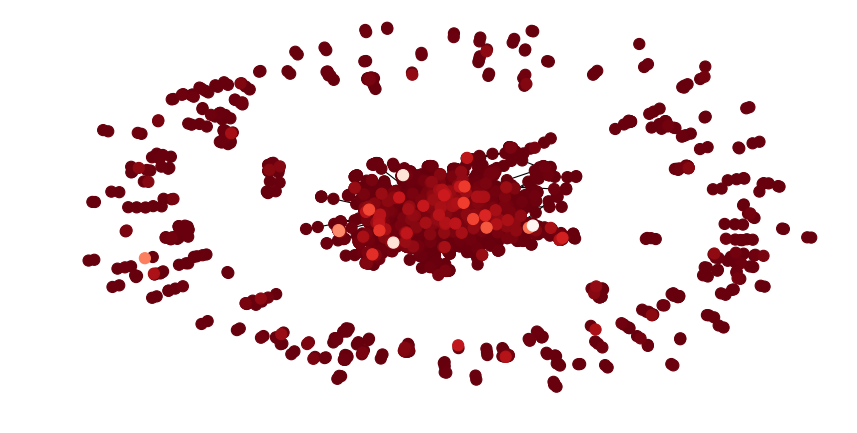

In [8]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(G, with_labels=False,node_size=100,
        node_color = sorted(list(dict(G.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

#nx.draw(G)
#plt.show()

In [10]:
print (nx.number_of_nodes(G),nx.number_of_edges(G))

4503 6187


<function matplotlib.pyplot.show(*args, **kw)>

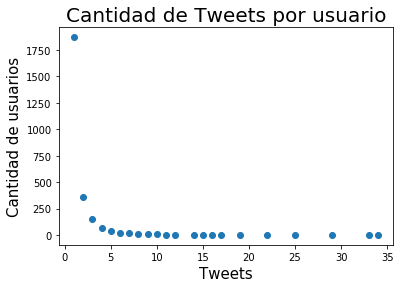

In [57]:
import collections
cantidadesTweets=[i['cantidad'] for i in Personas.values()]

Cantidades=collections.Counter(cantidadesTweets)
plt.scatter(list(Cantidades.keys()),list(Cantidades.values()))
plt.title('Cantidad de Tweets por usuario',size=20)
plt.xlabel('Tweets',size=15)
plt.ylabel('Cantidad de usuarios',size=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

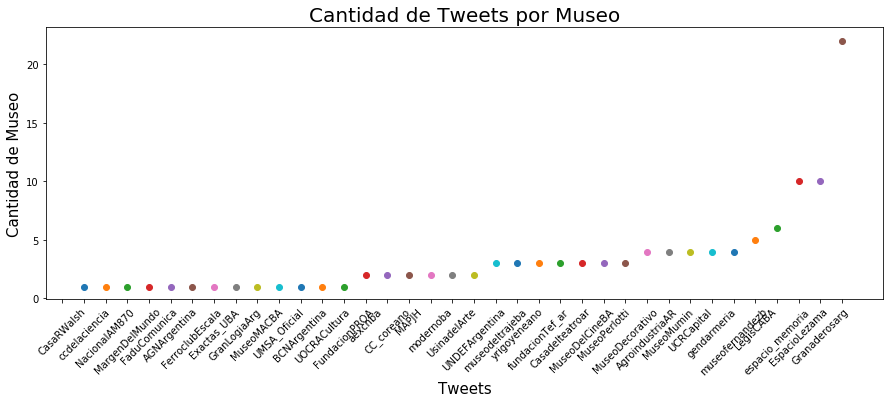

In [148]:

cantidadesTweets={}
for atributos in G.nodes():
    try:
        if (G.nodes[atributos]['Museo']):
            try:
                cantidadesTweets[atributos]=Personas[atributos]['cantidad']
            except:
                cantidadesTweets[atributos]=0
                
    except:
        pass

i=1
nombre=[]
fig = plt.figure(figsize=(15,5))
for key, value in sorted(cantidadesTweets.items(), key=lambda x:x[1]):
    plt.scatter(i,value)
    nombre.append(Personas[key]['autor'])
    i+=1
#    print(Personas[key]['autor'])

plt.xticks(range(i),nombre,rotation=45,size=10)
plt.title('Cantidad de Tweets por Museo',size=20)
plt.xlabel('Tweets',size=15)
plt.ylabel('Cantidad de Museo',size=15)
plt.show


In [29]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [30]:
# Tabla con las caraterísticas de las redes
info= pd.DataFrame({"ID":['LaNochedelosMuseos'],"nodos":Gc.number_of_nodes(),"enlaces":Gc.number_of_edges(),
                    "kmean":np.mean(list(dict(Gc.degree).values())),
                    "kmin":np.min(list(dict(Gc.degree).values())),
                    "kmax":np.max(list(dict(Gc.degree).values())),
                    "densidad":nx.density(Gc),"clusteringglobal":nx.transitivity(Gc),
                    "clusteringlocal":nx.average_clustering(Gc),"diametro":nx.diameter(Gc)})

In [31]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,enlaces,kmax,kmean,kmin,nodos
0,LaNochedelosMuseos,0.007351,0.046267,0.001443,17,1927,195,2.357187,1,1635


In [35]:
# Vrificando si la distribución es libre de escala

# Librería para crear contables
from collections import defaultdict

grados = defaultdict(int)                   # valor inicial es int: 0
for i in (list(dict(G.out_degree).values())): 
    grados[i]+=1                            # Para cada elemento de la lista el valor se incrementa en uno donde el grado es i
    gord = sorted(grados.items())     
    k, pk = np.array(gord).T                # Arma dos matrices con la misma dimension para el grafico.
                                            
    pk = [float(i) / sum(pk) for i in pk]   # Calculo de la probabilidad


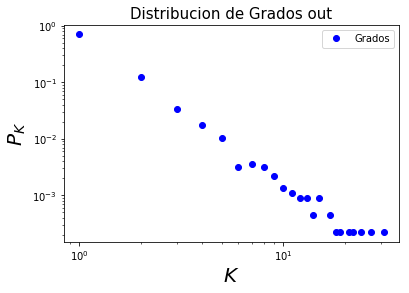

In [36]:
# Bineado lineal 

# Escala logartimica
plt.plot(k, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados out', fontsize = 15)
plt.show()

In [55]:
# Beneado Logaritmico para pk y k

# Para pk
grados = defaultdict(int)
j=1
while j<=(max((list(dict(G.out_degree).values())))):
    for i in (list(dict(G.out_degree).values())): 
        if i<=j and i>=j/2:
            grados[j]+=1        
    j=j*2        
gord = sorted(grados.items())    
k, pk = np.array(gord).T   
#print (pk,k)

pk = [i/float(j) for i,j in zip(pk,k)] #Aquí cambie a flotante porque me daba mal. Creo que por la version de python

# Para k
# Hace celdas equiespaciadas en escala logaritmica que dependen del grado
bins=[1]
s=1
j=1
for t in k[1:]:
    s=j+t/2  
    j=j+t
    bins.append(s)
print (bins,k)

[1, 2.0, 5.0, 11.0, 23.0] [ 1  2  4  8 16]


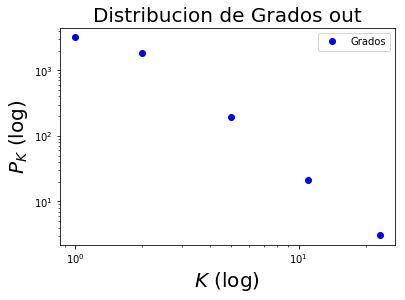

In [56]:
# Bineado logaritmico con escala lgaritmica en ambos ejes

plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados out', fontsize = 20)
plt.show()

In [14]:
# Exportar el grafo en formato adecuado para GEPHI
nx.write_gexf(Gc,'LaNochedelosMuseosCC.gexf')

In [24]:
#Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)
Grados=sorted(Bet,reverse=True,key=lambda x:Bet[x])
#print([data[i[0]]["autor"] for i in Grados[:10]])

for i in range(30):
    autor=api.get_user(Grados[i]).screen_name
    print (autor,G.degree(Grados[i]))

CulturaNacionAR 214
NocheMuseos 122
espacio_memoria 128
gcba 114
sebakatz 86
Adriveronica1 22
Exactas_UBA 83
ojovisor66 23
JuaNyP__ 86
mumimumi09 98
gendarmeria 81
batourplanner 24
MartaSinH83 14
nela_godoy 17
AbejaBlanca1303 4
FilmusDaniel 42
AySA_Oficial 32
EducacionAR 58
BancoCentral_AR 44
ciencia_ar 51
UCRCapital 38
Comunicacionucr 15
MuseoEvita 29
maumacrii 20
mercedesgm 19
dario_velez 16
LOLAMORA2005 12
fundacionTef_ar 26
AxelPino12 35
18Manifiesto 28


In [57]:
Aut=nx.pagerank(Grafo)
Centralidad=sorted(Aut,reverse=True,key=lambda x:Aut[x])
#print([data[i[0]]["autor"] for i in Grados[:10]])

for i in range(30):
    autor=api.get_user(Centralidad[i]).screen_name
    print (autor,round(Aut[Centralidad[i]],3))

hijos_capital 0.037
JuaNyP__ 0.034
FnaArgentina 0.025
La_Imposible 0.025
abuelasdifusion 0.021
CulturaNacionAR 0.02
gcba 0.012
PeronistasUnidx 0.012
NocheMuseos 0.011
charlypisoni 0.008
prensadelsubte 0.008
anabelpomar 0.008
EducacionAR 0.008
ciencia_ar 0.008
MuseoLarreta 0.007
la2x4 0.006
DisfrutemosBA 0.006
mumimumi09 0.006
Velez 0.006
SilBia05 0.006
sebakatz 0.005
FelipePigna 0.005
cabildonacional 0.005
MuseoHistorico 0.005
datacultura 0.004
ezequielvera 0.004
fsuarezlastra 0.004
herlombardi 0.004
DiputadosAR 0.004
sanmihanovich 0.003


In [58]:
Aut=Grafo.in_degree()

Centralidad=[a[0] for a in sorted(Aut,reverse=True,key=lambda x:x[1])]
#print([data[i[0]]["autor"] for i in Grados[:10]])


for i in range(30):
    autor=api.get_user(Centralidad[i]).screen_name
    
    print (autor,round(Aut[Centralidad[i]]))
    
    
   

CulturaNacionAR 202
abuelasdifusion 194
hijos_capital 189
gcba 113
NocheMuseos 108
mumimumi09 98
JuaNyP__ 85
Velez 77
sebakatz 72
La_Imposible 71
FelipePigna 65
EducacionAR 58
DisfrutemosBA 55
Ejercito_Arg 52
ciencia_ar 51
fsuarezlastra 45
DerechoUBA 42
FilmusDaniel 41
herlombardi 38
JorgeFavaloro 36
AxelPino12 35
Gracemazzola 34
eavogadro 33
PeronistasUnidx 33
MindefArg 33
AySA_Oficial 32
jrcapital 32
editorialjus 31
pechi_quiroga 29
CMN_Argentina 28


In [17]:
Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)

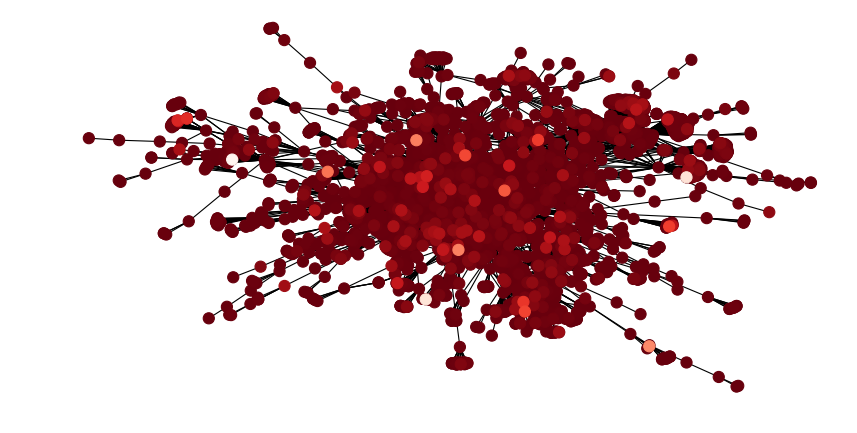

In [17]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Gc, with_labels=False,node_size=100,
        node_color = sorted(list(dict(Gc.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

In [13]:
import community 

In [28]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]
nx.set_node_attributes(G,part,"cluster")


In [29]:
import collections
clusters=collections.Counter(nx.get_node_attributes(G, 'cluster').values())
sk=sorted(clusters.keys(), reverse = True, key = lambda x:clusters[x])
print(sk)
nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
         with_labels=False
        ,node_color=[i[1] for i in G.nodes("cluster")],node_size = 20)


#print(G.nodes("cluster"))
print([i[1] for i in G.nodes("cluster")])

[9, 24, 20, 10, 28, 3, 0, 6, 13, 15, 25, 8, 16, 1, 22, 11, 7, 26, 19, 21, 39, 37, 23, 18, 2, 43, 30, 35, 53, 38, 68, 48, 14, 42, 52, 41, 33, 56, 31, 72, 46, 27, 57, 58, 36, 51, 54, 80, 74, 83, 121, 5, 34, 61, 100, 105, 47, 55, 71, 81, 90, 94, 107, 108, 119, 133, 144, 148, 151, 32, 45, 50, 63, 66, 75, 77, 86, 87, 88, 92, 97, 99, 124, 126, 127, 128, 131, 132, 137, 155, 161, 168, 175, 187, 4, 12, 17, 29, 40, 44, 49, 59, 60, 62, 64, 65, 67, 69, 70, 73, 76, 78, 79, 82, 84, 85, 89, 91, 93, 95, 96, 98, 101, 102, 103, 104, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 125, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 150, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 165, 166, 167, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190, 191, 192, 149, 164, 186]


KeyboardInterrupt: 

In [16]:
len(sk)

193

In [31]:
largo=0
cluster=[]
for i in G.nodes("cluster"):
    if i[1]==9:
        try:
            cluster.append(G.nodes[i[0]]["texto"])
        except:
            pass
            #cluster.append(i[0])
        #print(i[0],labels[indice])
        
        largo+=1
print (cluster)

['RT @espacio_memoria: Muestra de estudiantes de la CUSAM de la unidad penitenciaria 48 de San Martin #LaNocheDeLosMuseos en la ex ESMA https…', 'RT @espacio_memoria: Muestra Héroes afrodescendientes argentinos invisibilizados en el Archivo Nacional de la Memoria en #LaNocheDeLosMuseo…', 'RT @espacio_memoria: Se viene! \nEste sábado el Espacio Memoria participará de #LaNocheDeLosMuseos \n\n👇 Aquí podés ver nuestra programación c…', 'RT @espacio_memoria: La Tecnicatura de Música Popular de Madres de Plaza de Mayo Línea Fundadora también se suma a #LaNocheDeLosMuseos en l…', 'RT @espacio_memoria: El @MuseoSitioESMA en #LaNocheDeLosMuseos https://t.co/BfMVwiDabB', 'RT @La_Imposible: Ahora: Rosa Galati, directora de la Escuela 2 de 21, promotora del proyecto Arte+Participación+Identidad=Escuela Pública,…', 'RT @ddhhsubte: Lxs esperamos a todxs en @espacio_memoria en #LaNocheDeLosMuseos Venite!!! #AGTSYP #subte https://t.co/171IpbzLLr', 'RT @espacio_memoria: #LaNocheDeLosMuseos \nCompartimo

In [129]:
 G.nodes[182644738]

{'autor': u'abuelasdifusion',
 'cantidad': 18,
 'cluster': 17,
 'fecha': u'2018-11-08 21:27:58',
 'texto': u'Los esperamos el s\xe1bado en la Casa por la Identidad desde las 20 hs. en la #NocheDeLosMuseos https://t.co/kell0mX41L'}

In [ ]:
"""
Tweter de algunos museos de la ciudad de buenos aires

1 Museo del cine @MuseoDelCineBA
2 Museo de la ciudad @MuseoCiudadGCBA
3 Museo de arte español @MuseoLarreta
4 Museo Historico Savedra @MuseoSaavedra
5 Museo Carlos Gardel @MuseoGardel
6 Museo de arte popular @MAPJH
7 Museo Isaac Fernández Blanco @museofernandezb
8 Museo de Arte MODERNO @modernoba
9 Museo Perlotti @MuseoPerlotti
10 Museo Artes Plásticas Eduardo Sívori @museo_sivori
11 Usina del Arte @UsinadelArte
12 Museo Evita @MuseoEvita
13 Bellas Artes @BellasArtesAR
14 Museo Mitre @MuseoMitre
15 MuseoArtDecorativoAR @MuseoDecorativo
16 Museo H. Sarmiento @MuseoSarmiento
17 Museo Histórico @MuseoHistorico
18 centro cultural borges @centroborges
19 Museo Bicentenario @MuseoOficial
20 Museo Casa Rosada @CasaRosada
21 Museo Libro y Lengua @MLibroLengua
22 Museo Histórico Nacional Cabildo Nacional @cabildonacional
23 Policía Federal Argentina @PFAOficial
24 Museo del Traje BA @museodeltrajeba
25 Museo BCRA  @BancoCentral_AR

"""

In [112]:
G.nodes[745316089500999680]['cluster']

11

In [30]:
DD={}
DD[1]={'autor':(d[1]['autor']),'fecha':(d[1]['fecha']),'cantidad'=0}

In [31]:
DD[1]

{4: 3, 'holi': 3}

In [8]:
import csv

@AnaFrank_AR


In [38]:
print(len(cuentas))

162


In [26]:
Id=api.get_user('@Exactas_UBA').id

In [27]:
Id

584148959

# Red ego cuenta Nochemuseos

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import csv

In [3]:
with open("redegodelosmuseos.json",'r') as read:
    data=json.load(read)

In [4]:
Gego=nx.Graph()
j=0
for idtweet in data:
    if data[idtweet]==[]:
        j+=1

    for ret in (data[idtweet]):        
        Gego.add_edge(ret[1],ret[0])

In [14]:
# Agregamos atributos museos que siguen a la cuenta NocheMuseos

Museos={}
for d in Gego.nodes():
    #print(d)
    if d in cuentas:
        Museo=1
        print (d)
    else:
        Museo=0
    Museos[d]=Museo
nx.set_node_attributes(Gego,Museos,'Museo')

4105102085
549380248
946797264474910720
190343869
1030053311225974786
219662245
1246128246
166177152
384133681
855374056337657856
854452942660915201
160906413
1514254435
32953007
2493150020
529003599
826433648006160384
971807561027551233
2576979296
983458110827323393
783696032735649792
830082933096644608
710875353200336896
780769846745194496
745316089500999680
3218407217
281051064


In [5]:
cuentagego={}
for d in Gego.nodes():
    try:
        cuentagego[d]=api.get_user(d).screen_name
    except:
        print('no')
nx.set_node_attributes(Gego,cuentagego,'Cuenta')

no
no


In [6]:
archivo=open('cuentagego.txt','w')
archivo.write(str(cuentagego))
archivo.close()

In [ ]:
'''
archivo=open('cuentagego.txt','r')
leer=archivo.read()
cuentas={}
for Id in leer[1:-1].split(','):
    print(int(Id))
    cuentas.append(int(Id))

In [20]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Gego, with_labels=False,node_size=100)
#        node_color = sorted(list(dict(Gego.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

AttributeError: module 'matplotlib.colors' has no attribute 'to_rgba'

In [23]:
# Componente principal red ego
Gego_cp = max(nx.connected_component_subgraphs(Gego), key=len)

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Gego_cp, with_labels=False,node_size=100)
#        node_color = sorted(list(dict(Gego_cp.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

In [ ]:
# Tabla con las caraterísticas de la componente principal NocheMuseos
info= pd.DataFrame({"ID":['NochedelosMuseos'],"nodos":Gego_cp.number_of_nodes(),"enlaces":Gego_cp.number_of_edges(),
                    "kmean":np.mean(list(dict(Gego_cp.degree).values())),
                    "kmin":np.min(list(dict(Gego_cp.degree).values())),
                    "kmax":np.max(list(dict(Gego_cp.degree).values())),
                    "densidad":nx.density(Gego_cp),"clusteringglobal":nx.transitivity(Gego_cp),
                    "clusteringlocal":nx.average_clustering(Gego_cp),"diametro":nx.diameter(Gego_cp)})

In [ ]:
info

In [ ]:
# Vrificando si la distribución de grados es libre de escala

# Librería para crear contables
from collections import defaultdict

grados = defaultdict(int)                   # valor inicial es int: 0
for i in (list(dict(Gego_cp.degree).values())): 
    grados[i]+=1                            # Para cada elemento de la lista el valor se incrementa en uno donde el grado es i
    gord = sorted(grados.items())     
    k, pk = np.array(gord).T                # Arma dos matrices con la misma dimension para el grafico.
                                            
    pk = [float(i) / sum(pk) for i in pk]   # Calculo de la probabilidad

In [ ]:
# Bineado lineal 

# Escala logartimica
plt.plot(k, pk, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

In [ ]:
# Beneado Logaritmico para pk y k

# Para pk
grados = defaultdict(int)
j=1
while j<=(max((list(dict(Gego_cp.degree).values())))):
    for i in (list(dict(Gego_cp.degree).values())): 
        if i<=j and i>=j/2:
            grados[j]+=1        
    j=j*2        
gord = sorted(grados.items())    
k, pk = np.array(gord).T   
#print (pk,k)

pk = [i/float(j) for i,j in zip(pk,k)]
# Para k
# Hace celdas equiespaciadas en escala logaritmica que dependen del grado
bins=[1]
s=1
j=1
for t in k[1:]:
    s=j+t/2  
    j=j+t
    bins.append(s)
print (bins,k)

In [ ]:
# Bineado logaritmico con escala lgaritmica en ambos ejes

plt.plot(bins, pk, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

In [24]:
# Exportar el grafo en formato adecuado para GEPHI
nx.write_gexf(Gego_cp,'NocheMuseosCC.gexf')

In [21]:
 Gego.nodes[4105102085]

{'Museo': 1}

## Cantidad de twetts por hora

In [169]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

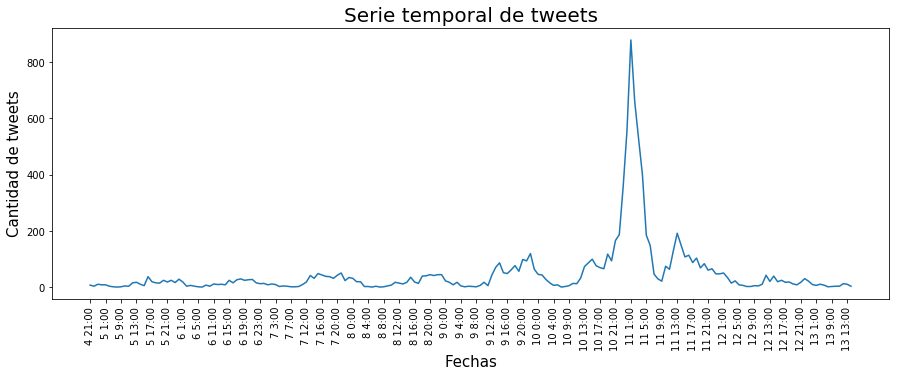

In [207]:
dias=[]
for idtweet in data:
    dia=(int(data[idtweet]["fecha"].split(' ')[0].split('-')[-1]))
    hora=int((data[idtweet]["fecha"].split(' ')[1].split(':')[0]))
    dias.append((dia,hora))
dias=(sorted(dias))
DicDias=collections.Counter(dias)
i=0
valores=[]
fechas=[]
for key, value in sorted(DicDias.items(), key=lambda x:x[0]):
    valores.append(value)
    fechas.append(str(key[0])+' '+str(key[1])+':00')
    i+=1
#print(DicDias.keys())
fig = plt.figure(figsize=(15,5))

plt.plot(range(i),valores)
plt.xticks(range(0,i,4),fechas[0:i:4],rotation=90)
plt.xlabel('Fechas', fontsize = 15)
plt.ylabel('Cantidad de tweets', fontsize = 15)
plt.title('Serie temporal de tweets', fontsize = 20)
plt.show()

## Rompiendo la red

In [44]:
# Extraer los nodos museos

#print (cuentas)

Grafo=G.copy()
i=0
for node in cuentas:
    if node in Grafo.nodes():
        Grafo.remove_node(node)
        i+=1
print (i)       

71


In [46]:
print (nx.number_of_nodes(G),nx.number_of_edges(G))
print (nx.number_of_nodes(Grafo),nx.number_of_edges(Grafo))

4503 6187
4432 4801


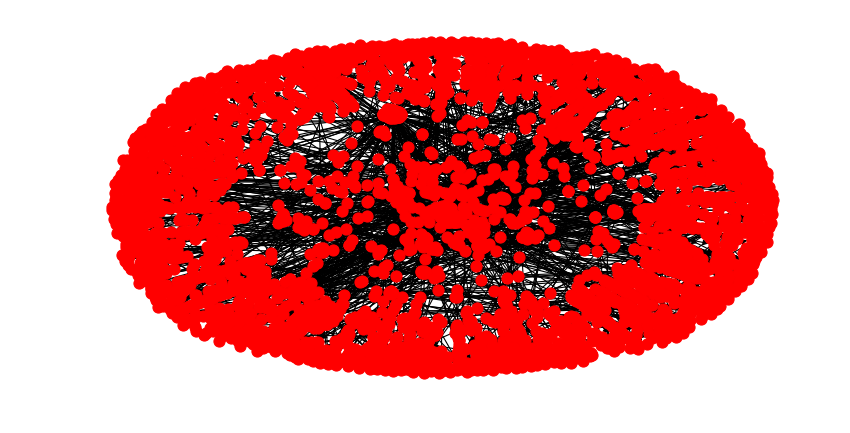

In [47]:

plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Grafo, with_labels=False,node_size=100)        
plt.show()

In [59]:
# Exportar el grafo en formato adecuado para GEPHI
nx.write_gexf(Grafo,'LaNochedelosMuseos@sinmuseos.gexf')